In [ ]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20006007
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

In [42]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import dataset
df = pd.read_csv('./dataset.csv')

df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True) # drop unnamed column
df.dropna(inplace=True) # drop rows with null values

df['valence'] = df['valence'].astype('category')
df['valence'] = df['valence'].map(lambda x: 0 if x < 0.5 else 1) # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df['explicit'] = df['explicit'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['key', 'time_signature', 'track_genre'], drop_first=True)

# Scalar
scalar = StandardScaler()

# X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
y = df['valence']

X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

# Get a random number for the random_state variable
import random
random_state = random.randint(1, 100)

# Train the code
attr_train, attr_test, target_train, target_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

print(df.head(1))

target_train.head()
# attr_train.head()
target_test.head()

                 track_id      artists album_name track_name  popularity  \
0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   

   duration_ms  explicit  danceability  energy  loudness  ...  \
0       230666         0         0.676   0.461    -6.746  ...   

   track_genre_spanish  track_genre_study  track_genre_swedish  \
0                False              False                False   

   track_genre_synth-pop  track_genre_tango  track_genre_techno  \
0                  False              False               False   

   track_genre_trance  track_genre_trip-hop  track_genre_turkish  \
0               False                 False                False   

   track_genre_world-music  
0                    False  

[1 rows x 145 columns]


78248     1
54790     0
29970     0
88887     1
101629    0
Name: valence, dtype: int64

In [39]:
# Train Naive Bayes model
model = GaussianNB()
model.fit(attr_train, target_train)

# Make Prediction
target_pred = model.predict(attr_test)

In [40]:
# Evaluate model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.6906

Confusion Matrix:
 [[11900  6512]
 [ 4069 11719]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.69     18412
           1       0.64      0.74      0.69     15788

    accuracy                           0.69     34200
   macro avg       0.69      0.69      0.69     34200
weighted avg       0.70      0.69      0.69     34200



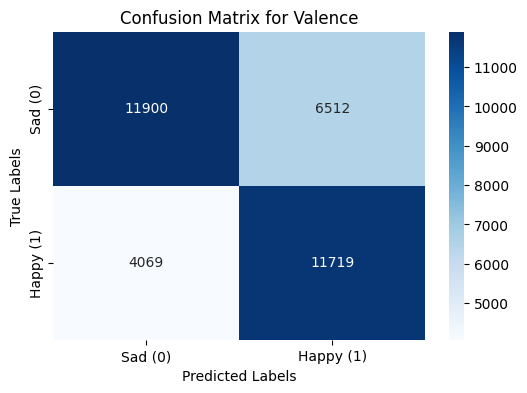

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()